<a href="https://colab.research.google.com/github/LavineLin/Soft-Coral-Environmental-Acclimation-Insights-from-Microbiome-and-Metabolome-Dynamics/blob/main/Microbiome_data_analysis_UMAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tool

In [ ]:
!git clone https://github.com/schonkopf/soundscape_IR.git
!pip install umap-learn
!pip install -U kaleido
!pip install -U csaps

fatal: destination path 'soundscape_IR' already exists and is not an empty directory.


In [ ]:
import pandas as pd
import numpy as np
import umap.umap_ as umap
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from csaps import csaps
from sklearn.decomposition import non_negative_factorization as NMF
import matplotlib.pyplot as plt
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")

def nmf_rmse(input_data, max_n_basis, random_state=40):
  rmse=np.zeros([1,max_n_basis])[0]
  for n in np.arange(1,max_n_basis+1):
    W, H, _ = NMF(input_data, n_components=n, init='random', random_state=40, update_H=True, alpha_W=0, beta_loss='frobenius', solver='cd', max_iter=200)
    reconstruction = np.dot(W, H)
    rmse[n-1]=np.power(np.mean(np.power(input_data-reconstruction,2)),0.5)

  #rmse=-1*np.diff(rmse)
  ax.plot(np.arange(1,max_n_basis+1),rmse)
  _ = ax.set_xlabel('Number of basis')
  _ = ax.set_ylabel('RMSE')
  return rmse


Exception ignored in: <function _xla_gc_callback at 0x78efdcd585e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
    
KeyboardInterrupt: 


# Load data
Exclude OTUs with total abundance (all samples) <1000

In [ ]:
path='.'

abundance_threshold=0.01
taxa_sort='OTU_ID' # Set to 'OTU'|'Species'|'Genus'|'Family'

In [ ]:
data=pd.read_csv(path+'/'+'amino_acid.csv', header=0)
abundance=np.sum(data.iloc[:,1:], axis=1)
process_list=np.where(abundance>=abundance_threshold)[0]
data=data.iloc[process_list,:]
data

,#OTU,LW0A,LW0B,LW0C,SW0A,SW0B,SW0C,LT0A,LT0B,LT0C,...,LW19C,SW19A,SW19B,SW19C,LT19A,LT19B,LT19C,ST19A,ST19B,ST19C
0,His,1.063517,0.000000,1.067717,0.000000,0.000000,0.000000,3.097113,10.667717,3.887664,...,1.727034,0.000000,0.000000,0.000000,0.000000,2.280315,0.000000,1.371129,0.755906,0.000000
1,Asn,1.958005,2.014698,2.300262,0.000000,0.000000,0.000000,8.165879,23.586352,8.337008,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Tau,249.944357,206.041995,218.572179,10.545932,9.418373,4.682415,732.723360,2210.305512,754.494488,...,252.419948,8.023097,6.687664,5.713386,143.908661,321.275591,188.687664,41.630446,9.701837,9.791076
3,Ser,2.627822,4.966929,2.845144,3.753281,8.459843,12.710761,8.037795,28.536483,12.184777,...,4.923885,5.817323,8.563780,8.212073,3.677690,8.403150,2.354856,17.055118,3.808924,5.690289
4,Gln,30.521785,6.154331,8.263517,3.980052,9.409974,7.669291,81.266142,130.971129,113.757480,...,17.614698,4.394751,1.909711,2.953281,9.895013,14.623622,12.191076,11.603150,1.150656,2.943832
5,Arg,1.274541,1.314436,1.331234,0.000000,0.000000,0.000000,3.385827,12.921785,2.420997,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.441470,0.000000,0.000000
6,Gly,3.581102,3.488714,3.290289,1.502362,1.667192,5.150656,2.625722,25.462467,7.969554,...,1.725984,1.230446,0.806299,0.966929,0.000000,2.640420,0.000000,2.613123,1.392126,1.164304
7,Asp,1.658793,1.008924,1.171654,1.089764,3.233596,9.057218,8.022047,10.291864,3.816273,...,1.960105,1.560105,3.330184,1.588451,2.145932,2.475591,2.441995,2.304462,0.000000,0.000000
8,Glu,3.335433,4.787402,4.552231,1.344882,2.748556,0.000000,11.398425,44.206824,14.236220,...,3.207349,1.715486,1.089764,1.822572,2.563780,4.971129,2.002100,2.644619,1.223097,0.000000
9,Thr,1.987402,2.131234,1.974803,3.624147,8.542782,6.977428,48.382152,74.137533,37.255643,...,7.780577,2.640420,2.170079,0.975328,1.743832,11.687139,8.569029,1.604199,4.393701,10.007349


In [ ]:
metadata=pd.read_csv(path+'/'+'metadata.csv', header=0)
metadata

,＃NAME,Name,Type,Time,Treatment,Colony,Environment,Env_Time
0,LT0A,LT0A,coral,0,Lobo,1,tank,tank_0
1,LT0B,LT0B,coral,0,Lobo,2,tank,tank_0
2,LT0C,LT0C,coral,0,Lobo,3,tank,tank_0
3,LT6A,LT6A,coral,6,Lobo,1,tank,tank_6
4,LT6B,LT6B,coral,6,Lobo,2,tank,tank_6
5,LT6C,LT6C,coral,6,Lobo,3,tank,tank_6
6,LT14A,LT14A,coral,14,Lobo,1,tank,tank_14
7,LT14B,LT14B,coral,14,Lobo,2,tank,tank_14
8,LT14C,LT14C,coral,14,Lobo,3,tank,tank_14
9,LW0A,LW0A,coral,0,Lobo,1,wild,wild_0


In [ ]:
taxa=pd.read_csv(path+'/'+'taxonomy.csv', header=0)
taxa=taxa.iloc[process_list,:]
taxa

,#TAXONOMY,aminoacid
0,His,His
1,Asn,Asn
2,Tau,Tau
3,Ser,Ser
4,Gln,Gln
5,Arg,Arg
6,Gly,Gly
7,Asp,Asp
8,Glu,Glu
9,Thr,Thr


In [ ]:
if taxa_sort=='OTU_ID':
  print('No sorting')
else:
  taxa_data=pd.concat([taxa, data], axis=1)
  taxa_data=taxa_data.groupby(taxa_sort).sum().reset_index()
  data=taxa_data.iloc[:,len(taxa.columns):]
  data['#OTU_ID']=taxa_data[taxa_sort]
  taxa=taxa_data[taxa_sort]
data

No sorting


,#OTU,LW0A,LW0B,LW0C,SW0A,SW0B,SW0C,LT0A,LT0B,LT0C,...,LW19C,SW19A,SW19B,SW19C,LT19A,LT19B,LT19C,ST19A,ST19B,ST19C
0,His,1.063517,0.000000,1.067717,0.000000,0.000000,0.000000,3.097113,10.667717,3.887664,...,1.727034,0.000000,0.000000,0.000000,0.000000,2.280315,0.000000,1.371129,0.755906,0.000000
1,Asn,1.958005,2.014698,2.300262,0.000000,0.000000,0.000000,8.165879,23.586352,8.337008,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Tau,249.944357,206.041995,218.572179,10.545932,9.418373,4.682415,732.723360,2210.305512,754.494488,...,252.419948,8.023097,6.687664,5.713386,143.908661,321.275591,188.687664,41.630446,9.701837,9.791076
3,Ser,2.627822,4.966929,2.845144,3.753281,8.459843,12.710761,8.037795,28.536483,12.184777,...,4.923885,5.817323,8.563780,8.212073,3.677690,8.403150,2.354856,17.055118,3.808924,5.690289
4,Gln,30.521785,6.154331,8.263517,3.980052,9.409974,7.669291,81.266142,130.971129,113.757480,...,17.614698,4.394751,1.909711,2.953281,9.895013,14.623622,12.191076,11.603150,1.150656,2.943832
5,Arg,1.274541,1.314436,1.331234,0.000000,0.000000,0.000000,3.385827,12.921785,2.420997,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.441470,0.000000,0.000000
6,Gly,3.581102,3.488714,3.290289,1.502362,1.667192,5.150656,2.625722,25.462467,7.969554,...,1.725984,1.230446,0.806299,0.966929,0.000000,2.640420,0.000000,2.613123,1.392126,1.164304
7,Asp,1.658793,1.008924,1.171654,1.089764,3.233596,9.057218,8.022047,10.291864,3.816273,...,1.960105,1.560105,3.330184,1.588451,2.145932,2.475591,2.441995,2.304462,0.000000,0.000000
8,Glu,3.335433,4.787402,4.552231,1.344882,2.748556,0.000000,11.398425,44.206824,14.236220,...,3.207349,1.715486,1.089764,1.822572,2.563780,4.971129,2.002100,2.644619,1.223097,0.000000
9,Thr,1.987402,2.131234,1.974803,3.624147,8.542782,6.977428,48.382152,74.137533,37.255643,...,7.780577,2.640420,2.170079,0.975328,1.743832,11.687139,8.569029,1.604199,4.393701,10.007349


# Identify OTU groups
Check OTU patterns across samples and treatments






## Use UMAP to analyze OTU heterogeneity
* **log_transform:** log10(n+1)
* **scale_normalize:** normalize the OTU abundance data of each sample to 0 and 1
* **UMAP_min_distance:** a value close to 0 will focus on regional variation (tend to overfit), and a value close to 1 will focus on global variation (avoid overfitting)


In [ ]:
log_transform=True
scale_normalize=False # not very effective for True
UMAP_min_distance=0.9 # between 0 and 1

# Data transformation
if log_transform:
    scaled_data=np.log10(data.iloc[:,1:]+1)
else:
    scaled_data=data.iloc[:,1:]

# Normalize each sample to 0-1
if scale_normalize:
    scaled_data=(scaled_data-scaled_data.min(axis=0))
    scaled_data=scaled_data/scaled_data.max(axis=0)

# Run UMAP analysis
umap_otu=umap.UMAP(n_components=1, metric='correlation', min_dist=UMAP_min_distance, random_state=10).fit(scaled_data)
otu_vector=np.argsort(umap_otu.embedding_[:,0])

# Save UMAP coordinates
umap_result=pd.DataFrame(umap_otu.embedding_)
umap_result=pd.concat([umap_result, taxa.reset_index(drop=True)],axis=1)
umap_result.to_csv('UMAP_OTU.csv', sep=',')



## Visualize UMAP result
Produce a heatmap of mean abundance (bin determined by *umap_bin_width*) to summarize OTU patterns across samples and treatments

In [ ]:
umap_bin_width=1 # value >0

# Create feature matrix
k=0
pick_umap=np.arange(np.floor(umap_result[0].min()),np.ceil(umap_result[0].max()),umap_bin_width)
W=np.zeros((len(pick_umap),scaled_data.shape[1]))+np.nan
for n in pick_umap:
    ind=np.where((umap_result[0]>=n)*(umap_result[0]<(n+umap_bin_width))==1)[0]
    W[k,:]=np.mean(scaled_data.iloc[ind,:],axis=0)
    k+=1

# Interactive visualization
fig = make_subplots(rows=1, cols=1)
fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)','paper_bgcolor': 'white'})
fig.add_trace(go.Heatmap(z=W, y=pick_umap+umap_bin_width/2, x=list(data.columns[1:]), coloraxis='coloraxis1'), row=1, col=1)
fig.update_yaxes(title_text='UMAP Coordinate', range=[np.floor(umap_result[0].min()), np.ceil(umap_result[0].max())], showgrid=False, zeroline=False, showline=True, linewidth=2, linecolor='black', mirror=True, row=1, col=1)
fig.update_xaxes(title_text='Sample', showgrid=False, zeroline=False, showline=True, linewidth=2, linecolor='black', mirror=True, row=1, col=1)
fig.update_layout(coloraxis1=dict(colorscale='Jet', showscale=True), bargap=0.05)
fig.show()
fig.write_html(file='UMAP_OTU_1D.html')

# Active the foll
save_figure=True
if save_figure:
  fig.write_image("UMAP_OTU_1D.jpg", height=400, width=1500, scale=5)

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


## Use Non-negative matrix factorization to group OTUs into clusters

Run a series of NMF to find a minimum number of clusters that can maximize the reconstruction performance

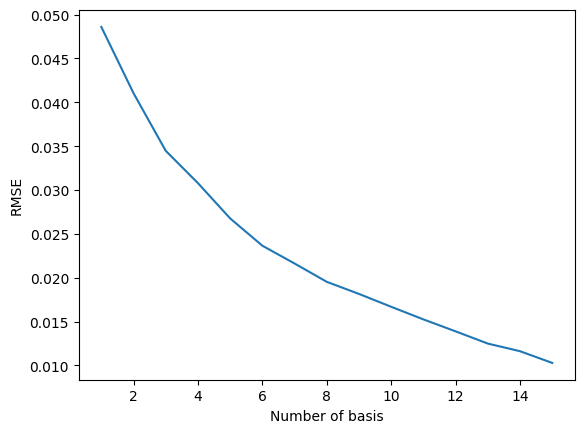

In [ ]:
fig, ax=plt.subplots()
rmse=nmf_rmse(input_data=scaled_data, max_n_basis=15, random_state=10)

## Visualize the activation scores of each OTU cluster

In [ ]:
OTU_clusters=4 # int >1

W, H, _ = NMF(scaled_data, n_components=OTU_clusters, init='random', random_state=10, update_H=True, alpha_W=0, beta_loss='frobenius', solver='cd', max_iter=200)
W_cluster=np.argmax(W, axis=1)

fig = go.Figure(data=go.Heatmap(z=H, x=list(data.columns[1:]), y=np.arange(H.shape[0]), colorscale='Jet'))
fig.show()
fig.write_html(file='NMF_OTU_1D.html')

save_figure=True
if save_figure:
  fig.write_image("NMF_OTU_1D.jpg", height=400, width=1500, scale=5)

## Save UMAP and NMF results

In [ ]:
umap_result.insert(1, 'Cluster', W_cluster)
umap_result.to_csv('UMAP_OTU.csv', sep=',')
umap_result

,0,Cluster,#OTU_ID,Total.lipid,Class,Lipid
0,-16.423080,0,10-oxo-docosanoic acid,Lipid,FA,10-oxo-docosanoic acid
1,6.570996,2,10-oxo-docosanoic acid,Lipid,FA,10-oxo-docosanoic acid
2,5.752301,2,"11,14-eicosadienoic acid",Lipid,FA,"11,14-eicosadienoic acid"
3,5.528347,2,"11(Z),14(Z)-Eicosadienoic acid",Lipid,FA,"11(Z),14(Z)-Eicosadienoic acid"
4,-3.094620,0,"11(Z),14(Z)-Eicosadienoic Acid",Lipid,FA,"11(Z),14(Z)-Eicosadienoic Acid"
...,...,...,...,...,...,...
1897,6.001340,2,PE(O-20:0/21:0),Lipid,PE,PE(O-20:0/21:0)
1898,6.186651,2,PE(O-20:0/22:1(11Z)),Lipid,PE,PE(O-20:0/22:1(11Z))
1899,5.594056,2,"PE(O-20:0/22:4(7Z,10Z,13Z,16Z))",Lipid,PE,"PE(O-20:0/22:4(7Z,10Z,13Z,16Z))"
1900,6.258801,2,"PE(O-20:0/22:6(4Z,7Z,10Z,13Z,16Z,19Z))",Lipid,PE,"PE(O-20:0/22:6(4Z,7Z,10Z,13Z,16Z,19Z))"


# Explore the temporal heterogeneity of treatments

## Use UMAP to analyze sample heterogeneity

*   **select_clusters:** Select OTU clusters that are highly related to treatmeants
*   **UMAP_n_neighbors:** like knn clustering
*   **UMAP_min_distance:** a value close to 0 will focus on regional variation (tend to overfit), and a value close to 1 will focus on global variation (avoid overfitting)




In [ ]:
select_clusters=[0,2,3] # a list of int
UMAP_n_neighbors=15 # int >1
UMAP_min_distance=0.9 # between 0 and 1

otu_cluster=pd.read_csv('UMAP_OTU.csv', header=0)
otu_select=np.where(otu_cluster['Cluster'].isin(select_clusters))[0]
#otu_select=np.arange(len(otu_vector)) # Active this line if you want to use all OTUs

# Run UMAP analysis
transform_data=scaled_data.T
umap_model=umap.UMAP(n_components=1, metric='correlation', n_neighbors=UMAP_n_neighbors, min_dist=UMAP_min_distance, random_state=40).fit(transform_data.iloc[:,otu_select])

# Save UMAP coordinates
umap_result=pd.DataFrame(umap_model.embedding_)
umap_result=pd.concat([umap_result, metadata.reset_index(drop=True)],axis=1)
umap_result.to_csv('UMAP_sample.csv', sep=',')

## Visualize the temporal variation of each treatment
Use cubic smoothing splines to fit the UMAP coordinates of each treament

*   **curve_smooth:** 0 for very general fitting, 1 for overfitting



In [ ]:
curve_smooth=0.5 # between 0 and 1

# Get unique groups
groups =umap_result['Environment']
unique_groups = groups.unique()

# Interactive visualization
time_interval=0.1
fig = make_subplots()
fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)','paper_bgcolor': 'white'})
color_palette = px.colors.qualitative.D3
for i, group in enumerate(unique_groups):
    group_data = umap_result[groups == group].reset_index(drop=True)
    group_data['Time']=group_data['Time']+np.random.rand(group_data.shape[0])/1000
    timevec=np.arange(group_data['Time'].min(), group_data['Time'].max()+time_interval, time_interval)
    spline_result = csaps(group_data['Time'][np.argsort(group_data['Time'])], group_data[0][np.argsort(group_data['Time'])], timevec, smooth=curve_smooth)

    color = color_palette[i % len(color_palette)]
    fig.add_trace(go.Scatter(x=group_data['Time'], y=group_data[0], mode='markers', name=group, marker=dict(color=color)))
    fig.add_trace(go.Scatter(x=timevec, y=spline_result, mode='lines', name=group + ' (smooth)', line=dict(color=color)))
fig.update_yaxes(title_text='UMAP Coordinate', range=[np.floor(umap_result[0].min()), np.ceil(umap_result[0].max())], linewidth=2, linecolor='black', mirror=True)
fig.update_xaxes(title_text='Time', range=[np.floor(umap_result['Time'].min())-1, np.ceil(umap_result['Time'].max())+1], linewidth=2, linecolor='black', mirror=True)
fig.show()
fig.write_html(file='UMAP_sample_ts.html')

save_figure=True
if save_figure:
  fig.write_image("UMAP_lipid_lobo.jpg", height=400, width=1000, scale=5)

## Visualize UMAP result
Produce a heatmap of mean abundance (bin determined by *umap_bin_width*) to summarize sample patterns and their links to OTU abundances

In [ ]:
umap_bin_width=1 # value >0

# Create feature matrix
k=0
pick_umap=np.arange(np.floor(umap_result[0].min()),np.ceil(umap_result[0].max()),umap_bin_width)
W=np.zeros((len(pick_umap),transform_data.shape[1]))+np.nan
for n in pick_umap:
    ind=np.where((umap_result[0]>=n)*(umap_result[0]<(n+umap_bin_width))==1)[0]
    W[k,:]=np.mean(transform_data.iloc[ind,:],axis=0)
    k+=1

# Interactive visualization
fig = make_subplots(rows=1, cols=1)
fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)','paper_bgcolor': 'white'}, height=600)
fig.add_trace(go.Heatmap(z=W[:,otu_vector], y=pick_umap+umap_bin_width/2, x=data['#OTU_ID'].iloc[otu_vector], coloraxis='coloraxis1'), row=1, col=1)
fig.update_yaxes(title_text='UMAP Coordinate', range=[np.floor(umap_result[0].min()), np.ceil(umap_result[0].max())], showgrid=False, zeroline=False, showline=True, linewidth=2, linecolor='black', mirror=True, row=1, col=1)
fig.update_xaxes(title_text='Sample', showgrid=False, zeroline=False, showline=True, linewidth=2, linecolor='black', mirror=True, row=1, col=1)
fig.update_layout(coloraxis1=dict(colorscale='Jet', showscale=True), bargap=0.05)
fig.show()
fig.write_html(file='UMAP_Sample_1D.html')

save_figure=True
if save_figure:
  fig.write_image("UMAP_Sample_1D.jpg", height=400, width=1000, scale=5)